In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sections = requests.get("http://localhost:8000/data/get-dummysections").json()
for section in sections:
    print(section.get("name"))

test-0
test-0
test-1-1
test-1-1-1
test-1-2-1
test-1-2-2
400mm-n-1
400mm-n-2
400mm-n-3
400mm-n-b-1
400mm-n-b-2
400mm-n-b-3
600mm-n-1
600mm-n-2
600mm-n-3
600mm-n-b-1
600mm-n-b-2
600mm-n-b-3
800mm-n-1
800mm-n-2
800mm-n-3
800mm-n-b-1
800mm-n-b-2
800mm-n-b-3
1000mm-n-1
1000mm-n-2
1000mm-n-3
1000mm-n-b-1
1000mm-n-b-2
1000mm-n-b-3
1200mm-n-1
1200mm-n-2
1200mm-n-3
1200mm-n-b-1
1200mm-n-b-2
1200mm-n-b-3
1400mm-n-1
1400mm-n-2
1400mm-n-3
1400mm-n-b-1
1400mm-n-b-2
1400mm-n-b-3
1600mm-n-1
1600mm-n-2
1600mm-n-3
1600mm-n-b-1
test-00
test-new-1-1-1
test-new-1-1-2
test-floor-1
calpoints-r-1
calpoints-r-2
calpoints-r-3
calpoints-r-4
calpoints-r-5
calpoints-l-1
calpoints-l-2
calpoints-l-3
calpoints-l-4
calpoints-l-5
measpoints-r-1
measpoints-r-2
measpoints-r-3
measpoints-r-4
measpoints-r-5
measpoints-l-1
measpoints-l-2
measpoints-l-3
measpoints-l-4
measpoints-l-5
calpoints-c-r-1
calpoints-c-r-2
calpoints-c-r-3
calpoints-c-r-4
calpoints-c-r-5
calpoints-c-l-1
calpoints-c-l-2
calpoints-c-l-3
calpoints-c-l-4

In [3]:
sections.keys()

AttributeError: 'list' object has no attribute 'keys'

In [182]:
for section in sections:
    if section.get("name").find("newconfig-pattern-1-") == 0:
        print(section.get("name"))

newconfig-pattern-1-1
newconfig-pattern-1-2
newconfig-pattern-1-3


In [183]:
# grid: 23
point_calc = []

for section in sections:
    if section.get("name").find("2024_11_28_pattern_6") ==0 :
        points = section.get("points")
        point_disp = []
        for point in points:
            h = point.get("h")
            v = point.get("v")
            l = point.get("l")
            point_disp.append([h,v,l])
        point_calc.append(point_disp)

point_arr = np.array(point_calc)
print(point_arr)


[[[44906 10292  5894]
  [45390  9742  6370]
  [45889  9225  6864]
  [46368  8778  7333]
  [46810  8379  7795]
  [47257  8028  8272]
  [47433  7868  8479]
  [48064  7409  9185]
  [48220  7331  9353]
  [48689  7058  9810]
  [49135  6808 10303]
  [49556  6582 10780]
  [49992  6360 11254]
  [50397  6175 11741]
  [45296  7745  8658]
  [46215  7297  9343]
  [35303  8266  7953]
  [36669  8049  8251]
  [37953  7835  8569]
  [39129  7610  8896]
  [39927  7346  9301]
  [41042  6972  9998]
  [41718  6744 10451]
  [42030  6521 10901]
  [42301  6296 11363]
  [42488  6136 11830]
  [35574  6872 10114]
  [36823  6558 10781]
  [30413  6870 10085]
  [31613  6750 10345]
  [32850  6644 10574]
  [34756  6262 11483]
  [35149  6059 11949]
  [35496  5895 12424]
  [31985  6417 11019]
  [33362  6164 11654]
  [29130  5988 12009]
  [30503  5797 12593]
  [27009  5673 12785]
  [27495  5639 12930]
  [28254  5549 13227]
  [28625  5488 13396]
  [25775  5649 12890]
  [28424  5336 13911]]]


In [184]:
#np.mean(point_arr[0]-point_arr[1], axis=0)

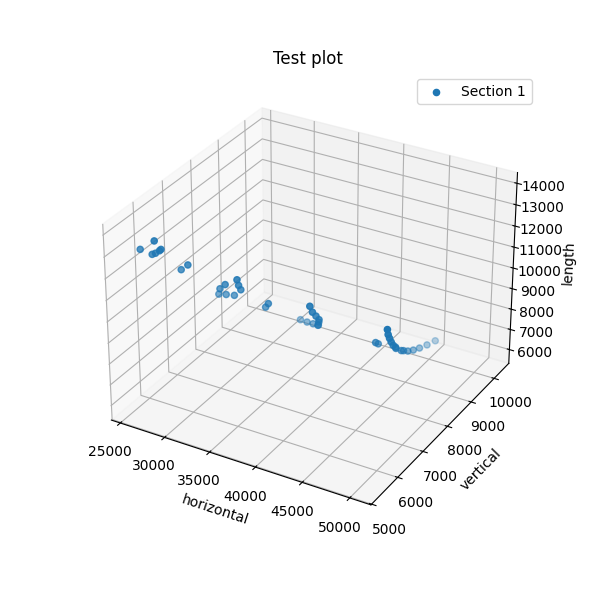

In [185]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


for i, section in enumerate(point_calc):
    section = np.array(section)
    x, y, z = section[:, 0], section[:, 1], section[:, 2]
    ax.scatter(x, y, z, marker='o', label=f'Section {i+1}')

# Labels and title
ax.set_xlabel('horizontal')
ax.set_ylabel('vertical')
ax.set_zlabel('length')
ax.set_title('Test plot')

# Display legend
ax.legend()

# Show the plot
plt.show()

In [186]:
mean_points = np.mean(point_arr, axis=0)
std_points = np.std(point_arr, axis=0)

In [187]:
print(mean_points)

print()

print(std_points)


p_diff = std_points/mean_points

print(p_diff *100)

[[44906. 10292.  5894.]
 [45390.  9742.  6370.]
 [45889.  9225.  6864.]
 [46368.  8778.  7333.]
 [46810.  8379.  7795.]
 [47257.  8028.  8272.]
 [47433.  7868.  8479.]
 [48064.  7409.  9185.]
 [48220.  7331.  9353.]
 [48689.  7058.  9810.]
 [49135.  6808. 10303.]
 [49556.  6582. 10780.]
 [49992.  6360. 11254.]
 [50397.  6175. 11741.]
 [45296.  7745.  8658.]
 [46215.  7297.  9343.]
 [35303.  8266.  7953.]
 [36669.  8049.  8251.]
 [37953.  7835.  8569.]
 [39129.  7610.  8896.]
 [39927.  7346.  9301.]
 [41042.  6972.  9998.]
 [41718.  6744. 10451.]
 [42030.  6521. 10901.]
 [42301.  6296. 11363.]
 [42488.  6136. 11830.]
 [35574.  6872. 10114.]
 [36823.  6558. 10781.]
 [30413.  6870. 10085.]
 [31613.  6750. 10345.]
 [32850.  6644. 10574.]
 [34756.  6262. 11483.]
 [35149.  6059. 11949.]
 [35496.  5895. 12424.]
 [31985.  6417. 11019.]
 [33362.  6164. 11654.]
 [29130.  5988. 12009.]
 [30503.  5797. 12593.]
 [27009.  5673. 12785.]
 [27495.  5639. 12930.]
 [28254.  5549. 13227.]
 [28625.  5488. 

In [188]:
differences = []

# Calculate the difference between each point in a section and the average
for section in point_arr:
    diff = section - mean_points  # Difference from the average
    differences.append(diff)

# Convert differences list to numpy array for easier manipulation if needed
differences_np = np.array(differences)

print("Differences from the average for each section:")
print(differences_np )

print("In percentage:")
print(differences_np / mean_points * 100)

Differences from the average for each section:
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
In percentage:
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]


# Plot XYZ conversion

In [189]:
HORIZONTAL_MAX = 228000
VERTICAL_MAX = 228000

LENGTH_OFFSET = 170 + 35 - 2 + 18 

V_SCALE = [
    1729, 2158, 2593, 3029, 3467, 
    3892, 4328, 4784, 5233, 5668, 
    6103, 6549, 7003, 7428, 7863, 
    8314, 8777, 9212, 9648, 10097, 
    10551, 10980, 11432, 11879, 12334, 
    12780, 13217, 13663, 14112, 14545, 
    14990, 15436, 15887, 16333, 16756, 
    17210, 17656, 18092, 18544, 18993, 
    19449, 19892, 20331, 20786, 21232,
    21668, 22113, 22559, 23012, 23448, 
    23878, 24329, 24776, 25220, 25666,
    26115, 26571
]
MM_CSALE = np.arange(200,3050,50)


def convert_to_xyz(h, v, l):
    # Normalize h and v to radians between 0 and 2π using numpy
    h_angle = (h % HORIZONTAL_MAX) * (2 * np.pi / HORIZONTAL_MAX)
    v_angle = (v % VERTICAL_MAX) * (2 * np.pi / VERTICAL_MAX)

    v_angle += np.pi/2
    # Compute the radial distance r
    #r = (l - LENGTH_V_OFFSET)*(LENGTH_MAX_VALUE_MM/ (LENGTH_MAX-LENGTH_V_OFFSET)) + LENGTH_OFFSET
    #r = p(l)
    #r = (l-VOLTAGE_ZERO)*((3000-17)/VOLTAGE_3000)+LENGTH_OFFSET
    r = np.interp([l],V_SCALE, MM_CSALE) + LENGTH_OFFSET
    # Convert spherical to Cartesian coordinates
    x = r * np.sin(v_angle) * np.cos(h_angle)
    y = r * np.sin(v_angle) * np.sin(h_angle)
    z = r * np.cos(v_angle)
    

    return x, y, z

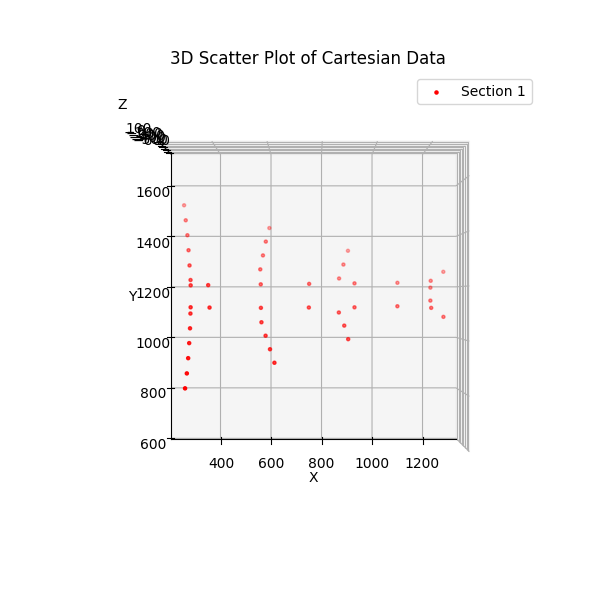

Average Points:
[[[ 281.7207339 ]
  [ 813.75433603]
  [-251.00810313]]

 [[ 288.36959364]
  [ 870.33970328]
  [-252.23965918]]

 [[ 293.40515901]
  [ 928.09432271]
  [-252.92290403]]

 [[ 297.1866202 ]
  [ 985.11443177]
  [-253.88104022]]

 [[ 300.31772578]
  [1041.19307099]
  [-254.76394101]]

 [[ 301.86835125]
  [1097.14636174]
  [-255.93542343]]

 [[ 302.55453225]
  [1120.86662072]
  [-255.75061423]]

 [[ 302.66182874]
  [1204.10457217]
  [-257.07909791]]

 [[ 302.13829885]
  [1224.25950322]
  [-258.27701698]]

 [[ 298.27783988]
  [1279.48304963]
  [-258.80845451]]

 [[ 294.45219155]
  [1337.1953178 ]
  [-259.94358841]]

 [[ 290.06330939]
  [1394.08351465]
  [-261.15263607]]

 [[ 283.72750553]
  [1450.82653568]
  [-261.78614349]]

 [[ 277.43174947]
  [1507.78406426]
  [-263.43395069]]

 [[ 374.26181017]
  [1119.84956692]
  [-255.90841911]]

 [[ 369.02899011]
  [1204.86193336]
  [-256.86634141]]

 [[ 620.21062436]
  [ 910.61358507]
  [-255.4065884 ]]

 [[ 603.42819955]
  [ 961.888088

In [190]:
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D



data_cartesian = []
for section in point_calc:
    section_cartesian = [convert_to_xyz(h, v, l) for h, v, l in section]
    #section_cartesian = [convert_to_xyz(h, 0, l) for h, v, l in section]
    data_cartesian.append(section_cartesian)

data_np  = np.array(data_cartesian)

# Calculate the average and standard deviation
mean_points = np.mean(data_np, axis=0)
std_points = np.std(data_np, axis=0)

# Calculate the difference between each section and the average
differences = []
for section in data_np:
    diff = section - mean_points  # Difference from the average
    differences.append(diff)

# Convert differences list to numpy array
differences_np = np.array(differences)

# Plot the Cartesian coordinates for each section
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

# Plot each section as a scatter plot
colors = ['r', 'g', 'b']
for i, section in enumerate(data_np):
    x, y, z = section[:, 0], section[:, 1], section[:, 2]
    ax.scatter(x, y, z, color=colors[i % len(colors)], label=f'Section {i+1}', s=5)

# Plot average points
#ax.scatter(mean_points[:, 0], mean_points[:, 1], mean_points[:, 2], color='k', label='Mean Points', s=5, marker='x')

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot of Cartesian Data')
ax.axis("equal")

ax.view_init(elev=90, azim=-90, roll=0)

# Show legend
ax.legend()

# Show the plot
plt.show()

# Print results
print("Average Points:")
print(mean_points)

print("\nStandard Deviation of Points:")
print(std_points)

print("\nDifferences from the average for each section:")
print(differences_np)

In [191]:
print(np.max(differences_np))

0.0


(np.float64(228.2533869675563),
 np.float64(1310.1773621237326),
 np.float64(838.4674852320275),
 np.float64(1539.656282303974))

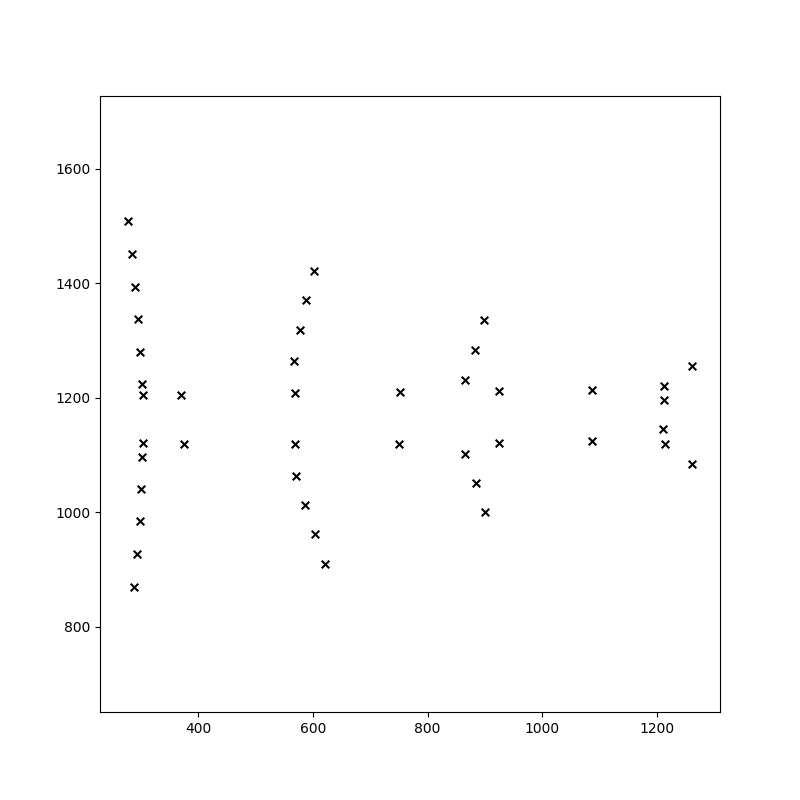

In [192]:
plt.figure(figsize=(8,8))
plt.scatter(mean_points[1:,0], mean_points[1:,1], color='k', label='Mean Points', s=30, marker='x')
plt.axis("equal")

In [193]:
def calc_dist(point1, point2):
    return np.linalg.norm(point1-point2)

In [194]:
calc_dist(mean_points[0],mean_points[-1])
calc_dist(mean_points[0],mean_points[43])

np.float64(1074.1013637267954)

In [195]:
for i in range (len(mean_points)-1):
    print(f"{i} - {i+1} : {calc_dist(mean_points[i], mean_points[i+1]):.2f}")

0 - 1 : 56.99
1 - 2 : 57.98
2 - 3 : 57.15
3 - 4 : 56.17
4 - 5 : 55.99
5 - 6 : 23.73
6 - 7 : 83.25
7 - 8 : 20.20
8 - 9 : 55.36
9 - 10 : 57.85
10 - 11 : 57.07
11 - 12 : 57.10
12 - 13 : 57.33
13 - 14 : 399.91
14 - 15 : 85.18
15 - 16 : 386.88
16 - 17 : 53.96
17 - 18 : 53.89
18 - 19 : 53.36
19 - 20 : 54.60
20 - 21 : 89.28
21 - 22 : 56.73
22 - 23 : 53.94
23 - 24 : 53.52
24 - 25 : 53.17
25 - 26 : 336.61
26 - 27 : 89.66
27 - 28 : 256.67
28 - 29 : 53.51
29 - 30 : 53.81
30 - 31 : 129.08
31 - 32 : 55.25
32 - 33 : 55.02
33 - 34 : 215.94
34 - 35 : 90.94
35 - 36 : 184.34
36 - 37 : 88.95
37 - 38 : 159.42
38 - 39 : 27.78
39 - 40 : 49.12
40 - 41 : 25.95
41 - 42 : 144.95
42 - 43 : 170.94


In [196]:
for sec in data_np:
    for i in range (len(sec)-1):
        if i == 7:
            continue
        print(f"{i+1} - {i+2} : {calc_dist(sec[i], sec[i+1]):.2f}")
    print("-------------------")

1 - 2 : 56.99
2 - 3 : 57.98
3 - 4 : 57.15
4 - 5 : 56.17
5 - 6 : 55.99
6 - 7 : 23.73
7 - 8 : 83.25
9 - 10 : 55.36
10 - 11 : 57.85
11 - 12 : 57.07
12 - 13 : 57.10
13 - 14 : 57.33
14 - 15 : 399.91
15 - 16 : 85.18
16 - 17 : 386.88
17 - 18 : 53.96
18 - 19 : 53.89
19 - 20 : 53.36
20 - 21 : 54.60
21 - 22 : 89.28
22 - 23 : 56.73
23 - 24 : 53.94
24 - 25 : 53.52
25 - 26 : 53.17
26 - 27 : 336.61
27 - 28 : 89.66
28 - 29 : 256.67
29 - 30 : 53.51
30 - 31 : 53.81
31 - 32 : 129.08
32 - 33 : 55.25
33 - 34 : 55.02
34 - 35 : 215.94
35 - 36 : 90.94
36 - 37 : 184.34
37 - 38 : 88.95
38 - 39 : 159.42
39 - 40 : 27.78
40 - 41 : 49.12
41 - 42 : 25.95
42 - 43 : 144.95
43 - 44 : 170.94
-------------------


In [197]:
for sec in data_np:
    for i in range (len(sec)-6):
        if i == 0:
            continue
        print(f"{i+1} - {i+6} : {calc_dist(sec[i], sec[i+6]):.2f}")
    print("-------------------")

2 - 7 : 334.11
3 - 8 : 296.34
4 - 9 : 294.41
5 - 10 : 296.11
6 - 11 : 297.22
7 - 12 : 330.55
8 - 13 : 304.79
9 - 14 : 126.92
10 - 15 : 102.85
11 - 16 : 536.76
12 - 17 : 533.87
13 - 18 : 532.35
14 - 19 : 532.03
15 - 20 : 194.69
16 - 21 : 199.34
17 - 22 : 358.11
18 - 23 : 356.75
19 - 24 : 356.94
20 - 25 : 358.61
21 - 26 : 181.73
22 - 27 : 183.42
23 - 28 : 425.57
24 - 29 : 407.27
25 - 30 : 386.00
26 - 31 : 326.37
27 - 32 : 209.14
28 - 33 : 193.51
29 - 34 : 123.06
30 - 35 : 164.89
31 - 36 : 223.25
32 - 37 : 221.91
33 - 38 : 371.12
34 - 39 : 365.21
35 - 40 : 297.45
36 - 41 : 289.27
37 - 42 : 179.20
38 - 43 : 179.07
-------------------


In [198]:
for sec in point_calc:
    for i in range(len(sec) -1):
        if i == 0:
            continue
        print(np.array(sec[i]) -np.array(sec[i+1]))
    print("---------------")

[-499  517 -494]
[-479  447 -469]
[-442  399 -462]
[-447  351 -477]
[-176  160 -207]
[-631  459 -706]
[-156   78 -168]
[-469  273 -457]
[-446  250 -493]
[-421  226 -477]
[-436  222 -474]
[-405  185 -487]
[ 5101 -1570  3083]
[-919  448 -685]
[10912  -969  1390]
[-1366   217  -298]
[-1284   214  -318]
[-1176   225  -327]
[-798  264 -405]
[-1115   374  -697]
[-676  228 -453]
[-312  223 -450]
[-271  225 -462]
[-187  160 -467]
[6914 -736 1716]
[-1249   314  -667]
[6410 -312  696]
[-1200   120  -260]
[-1237   106  -229]
[-1906   382  -909]
[-393  203 -466]
[-347  164 -475]
[3511 -522 1405]
[-1377   253  -635]
[4232  176 -355]
[-1373   191  -584]
[3494  124 -192]
[-486   34 -145]
[-759   90 -297]
[-371   61 -169]
[2850 -161  506]
[-2649   313 -1021]
---------------


In [199]:
for j in point_calc:
    print(j)

[[44906, 10292, 5894], [45390, 9742, 6370], [45889, 9225, 6864], [46368, 8778, 7333], [46810, 8379, 7795], [47257, 8028, 8272], [47433, 7868, 8479], [48064, 7409, 9185], [48220, 7331, 9353], [48689, 7058, 9810], [49135, 6808, 10303], [49556, 6582, 10780], [49992, 6360, 11254], [50397, 6175, 11741], [45296, 7745, 8658], [46215, 7297, 9343], [35303, 8266, 7953], [36669, 8049, 8251], [37953, 7835, 8569], [39129, 7610, 8896], [39927, 7346, 9301], [41042, 6972, 9998], [41718, 6744, 10451], [42030, 6521, 10901], [42301, 6296, 11363], [42488, 6136, 11830], [35574, 6872, 10114], [36823, 6558, 10781], [30413, 6870, 10085], [31613, 6750, 10345], [32850, 6644, 10574], [34756, 6262, 11483], [35149, 6059, 11949], [35496, 5895, 12424], [31985, 6417, 11019], [33362, 6164, 11654], [29130, 5988, 12009], [30503, 5797, 12593], [27009, 5673, 12785], [27495, 5639, 12930], [28254, 5549, 13227], [28625, 5488, 13396], [25775, 5649, 12890], [28424, 5336, 13911]]


In [200]:
for sec in data_np:
    print(sec)
    print(np.diff(sec[:,0]))
    print(np.diff(sec[:,1]))
    print(np.diff(sec[:,2]))
    print("----")

[[[ 281.7207339 ]
  [ 813.75433603]
  [-251.00810313]]

 [[ 288.36959364]
  [ 870.33970328]
  [-252.23965918]]

 [[ 293.40515901]
  [ 928.09432271]
  [-252.92290403]]

 [[ 297.1866202 ]
  [ 985.11443177]
  [-253.88104022]]

 [[ 300.31772578]
  [1041.19307099]
  [-254.76394101]]

 [[ 301.86835125]
  [1097.14636174]
  [-255.93542343]]

 [[ 302.55453225]
  [1120.86662072]
  [-255.75061423]]

 [[ 302.66182874]
  [1204.10457217]
  [-257.07909791]]

 [[ 302.13829885]
  [1224.25950322]
  [-258.27701698]]

 [[ 298.27783988]
  [1279.48304963]
  [-258.80845451]]

 [[ 294.45219155]
  [1337.1953178 ]
  [-259.94358841]]

 [[ 290.06330939]
  [1394.08351465]
  [-261.15263607]]

 [[ 283.72750553]
  [1450.82653568]
  [-261.78614349]]

 [[ 277.43174947]
  [1507.78406426]
  [-263.43395069]]

 [[ 374.26181017]
  [1119.84956692]
  [-255.90841911]]

 [[ 369.02899011]
  [1204.86193336]
  [-256.86634141]]

 [[ 620.21062436]
  [ 910.61358507]
  [-255.4065884 ]]

 [[ 603.42819955]
  [ 961.88808867]
  [-256.0817

In [201]:
d = 4
for i in range (len(mean_points)-d):
    if i == 0:
        continue
    print(f"{i+1} - {i+d} : {calc_dist(mean_points[i], mean_points[i+d]):.2f}")

2 - 5 : 227.24
3 - 6 : 193.01
4 - 7 : 219.08
5 - 8 : 183.11
6 - 9 : 182.39
7 - 10 : 216.52
8 - 11 : 190.44
9 - 12 : 227.34
10 - 13 : 229.30
11 - 14 : 231.57
12 - 15 : 205.08
13 - 16 : 636.47
14 - 17 : 635.87
15 - 18 : 237.72
16 - 19 : 246.17
17 - 20 : 214.30
18 - 21 : 248.56
19 - 22 : 252.36
20 - 23 : 253.58
21 - 24 : 252.04
22 - 25 : 215.98
23 - 26 : 234.17
24 - 27 : 205.68
25 - 28 : 484.21
26 - 29 : 466.51
27 - 30 : 115.28
28 - 31 : 115.41
29 - 32 : 283.54
30 - 33 : 284.17
31 - 34 : 62.48
32 - 35 : 61.35
33 - 36 : 258.60
34 - 37 : 223.48
35 - 38 : 290.82
36 - 39 : 295.10
37 - 40 : 143.79
38 - 41 : 126.50
39 - 42 : 57.63
40 - 43 : 119.82


In [202]:
#print(f"{2} - {11} : {calc_dist(mean_points[1], mean_points[10])}")
print(f"{1} - {10} : {calc_dist(mean_points[1], mean_points[7])}")
print(f"{2} - {9} : {calc_dist(mean_points[14], mean_points[20])}")
print(f"{3} - {8} : {calc_dist(mean_points[26] ,mean_points[32])}")
print(f"{4} - {7} : {calc_dist(mean_points[39], mean_points[44])}")
print(f"{4} - {7} : {calc_dist(mean_points[52], mean_points[57])}")
print(f"{4} - {7} : {calc_dist(mean_points[65], mean_points[70])}")
print(f"{4} - {7} : {calc_dist(mean_points[78], mean_points[83])}")

1 - 10 : 334.1057854263032
2 - 9 : 194.69439318440507
3 - 8 : 209.13559608826893


IndexError: index 44 is out of bounds for axis 0 with size 44

In [ ]:
for i in range(len(mean_points)):
    for j in range(len(mean_points)):
        if i == j or j< i:
            continue
        print(f"{i+1} - {j+1} : {calc_dist(mean_points[i], mean_points[j])}")
        #print(f"Diff: {g_truth[i][j] - calc_dist(mean_points[i], mean_points[j])}\n\n")

1 - 2 : 56.91004156632222
1 - 3 : 114.69788559237232
1 - 4 : 171.03111496955103
1 - 5 : 227.12688934883363
1 - 6 : 282.5493943020577
1 - 7 : 305.4772119242994
1 - 8 : 388.0559400581564
1 - 9 : 409.33371996997374
1 - 10 : 464.0997029836047
1 - 11 : 519.9379233456298
1 - 12 : 575.8098696161708
1 - 13 : 633.1988832292965
1 - 14 : 689.4295427879789
1 - 15 : 318.692721221142
1 - 16 : 399.80262104177933
1 - 17 : 353.77012332524686
1 - 18 : 355.60433658680995
1 - 19 : 364.4343178287052
1 - 20 : 382.2617989795751
1 - 21 : 418.8540292529258
1 - 22 : 486.72494933087495
1 - 23 : 530.8773854854009
1 - 24 : 581.6017202805779
1 - 25 : 632.0785201168152
1 - 26 : 684.028057145363
1 - 27 : 561.0076611891299
1 - 28 : 614.4100003778021
1 - 29 : 647.2369107876463
1 - 30 : 648.6873818419688
1 - 31 : 649.844339657605
1 - 32 : 716.961763909691
1 - 33 : 761.3421921176603
1 - 34 : 806.4880780971865
1 - 35 : 713.7913682212053
1 - 36 : 757.1514711593869
1 - 37 : 863.6183981734201
1 - 38 : 899.393220757595
1 - 39

In [ ]:
#HORIZONTAL_MAX = 228000
HORIZONTAL_MAX = 228000
#VERTICAL_MAX = 228000
VERTICAL_MAX = 228000
LENGTH_MAX = 32767
#LENGTH_MAX_VALUE_MM = 1830 # without offset
LENGTH_MAX_VALUE_MM = 1830 # without offset

LENGTH_V_OFFSET = 8367

LENGTH_OFFSET = 34 + 152 + 28.3 # mm
HEIGHT_OFFSET = 0

def convert_to_xyz(h, v, l):
    # Normalize h and v to radians between 0 and 2π using numpy
    h_angle = (h % HORIZONTAL_MAX) * (2 * np.pi / HORIZONTAL_MAX)
    v_angle = (v % VERTICAL_MAX) * (2 * np.pi / VERTICAL_MAX)
    
    # Compute the radial distance r
    r = (l - LENGTH_V_OFFSET)*(LENGTH_MAX_VALUE_MM/ (LENGTH_MAX-LENGTH_V_OFFSET)) + LENGTH_OFFSET
    
    # Convert spherical to Cartesian coordinates
    x = r * np.cos(v_angle) * np.cos(h_angle)
    y = r * np.cos(v_angle) * np.sin(h_angle)
    z = r * np.sin(v_angle)
    

    return x, y, z

data_cartesian = []
for section in point_calc:
    section_cartesian = [convert_to_xyz(h, v, l) for h, v, l in section]
    data_cartesian.append(section_cartesian)

data_np  = np.array(data_cartesian)

# Calculate the average and standard deviation
mean_points = np.mean(data_np, axis=0)


for i in range(len(mean_points)):
    for j in range(len(mean_points)):
        if i == j or j< i:
            continue
        #print(f"{i+1} - {j+1} : {calc_dist(mean_points[i], mean_points[j])}\n")
        print(f"Diff: {g_truth[i][j] - calc_dist(mean_points[i], mean_points[j])}")

NameError: name 'g_truth' is not defined

In [ ]:
# rotate coordinate system 
def rotate_to_xy_plane(points, p1, p2, p3):
    # Calculate vectors from the three points
    v1 = p2 - p1
    v2 = p3 - p1

    # Calculate the normal vector to the plane (cross product of v1 and v2)
    normal_vector = np.cross(v1, v2)
    normal_vector /= np.linalg.norm(normal_vector)  # Normalize the normal vector

    # Z-axis is the target direction
    z_axis = np.array([0, 0, 1])

    # Calculate the rotation axis (cross product between normal and z-axis)
    rotation_axis = np.cross(normal_vector, z_axis)
    axis_length = np.linalg.norm(rotation_axis)

    # If the normal vector is already aligned with z-axis, no rotation is needed
    if axis_length != 0:
        rotation_axis /= axis_length  # Normalize the rotation axis

        # Calculate the angle of rotation using dot product
        cos_theta = np.dot(normal_vector, z_axis)
        angle = np.arccos(cos_theta)  # Angle between normal and z-axis

        # Compute the skew-symmetric cross-product matrix for the rotation axis
        K = np.array([
            [0, -rotation_axis[2], rotation_axis[1]],
            [rotation_axis[2], 0, -rotation_axis[0]],
            [-rotation_axis[1], rotation_axis[0], 0]
        ])

        # Use Rodrigues' rotation formula to compute the rotation matrix
        R = np.eye(3) + np.sin(angle) * K + (1 - np.cos(angle)) * np.dot(K, K)

        # Apply the rotation matrix to all points
        rotated_points = np.dot(points, R.T)  # Rotate all points
    else:
        # If already aligned, no rotation is required
        rotated_points = points

    return rotated_points

In [ ]:
rotated_points = rotate_to_xy_plane(mean_points, mean_points[0], mean_points[2], mean_points[8])

In [ ]:
rotated_points

array([[   8.8770229 , -246.9754009 ,  -26.01153238],
       [ -18.12149471, -239.87745738,  -25.41705866],
       [ -44.96001637, -238.56072521,  -26.01153238],
       [ -74.41578813, -243.87445413,  -26.75222839],
       [-107.16285439, -252.92574457,  -27.8549883 ],
       [-144.89718556, -265.86142585,  -29.58645783],
       [-187.70106556, -280.2392405 ,  -31.93302474],
       [ -23.17834886, -297.77996371,  -24.99865963],
       [ -54.17155255, -297.00672333,  -26.01153238],
       [ -86.7010925 , -299.72896416,  -25.71816922],
       [-121.8695406 , -306.72736041,  -26.9529952 ],
       [-161.62145726, -317.8752476 ,  -27.98430846],
       [-205.75669965, -329.98112485,  -29.93557108]])

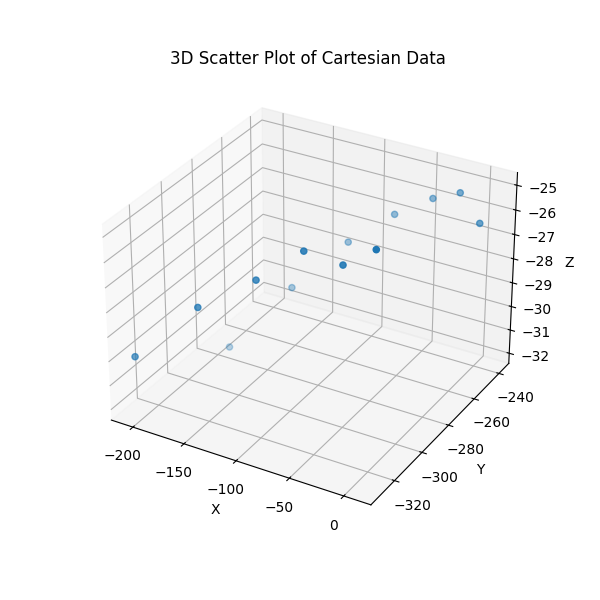

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

# Plot each section as a scatter plot
colors = ['r', 'g', 'b']
ax.scatter(rotated_points[:,0], rotated_points[:,1], rotated_points[:,2])

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot of Cartesian Data')


# Show the plot
plt.show()